<a href="https://colab.research.google.com/github/AlekseyBuzmakov/2023-TextAI/blob/main/2023_TextAI_TextGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Курс TextAI

# Материалы: https://bit.ly/2023-TextAI

# GitHUB: https://github.com/AlekseyBuzmakov/2023-TextAI

# Генерация текста и GPT

## Отличие от BERT

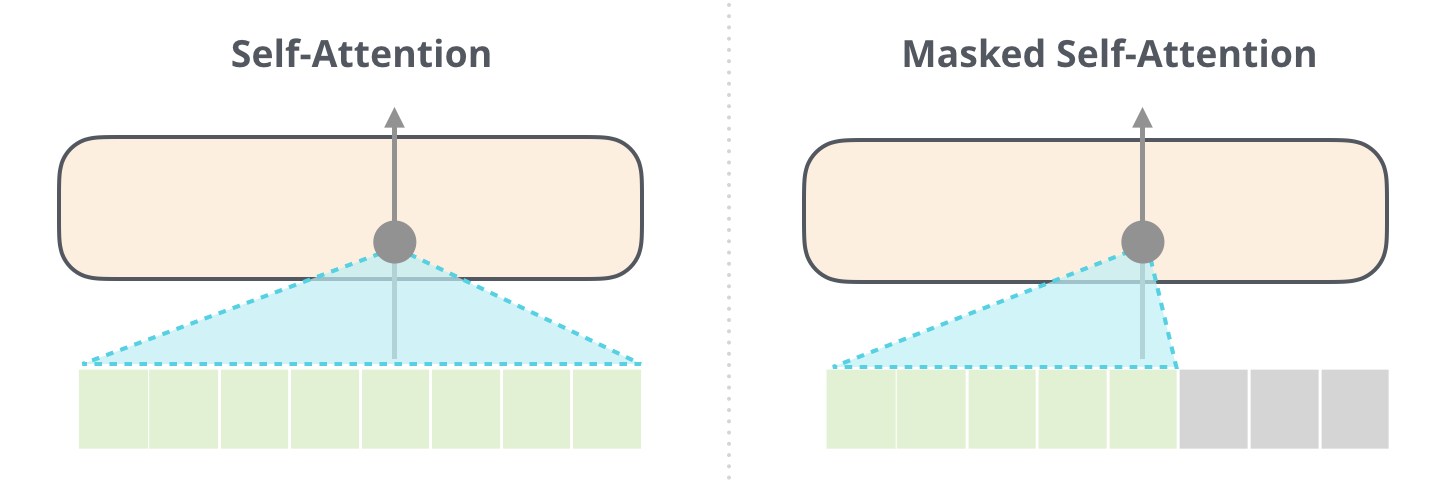

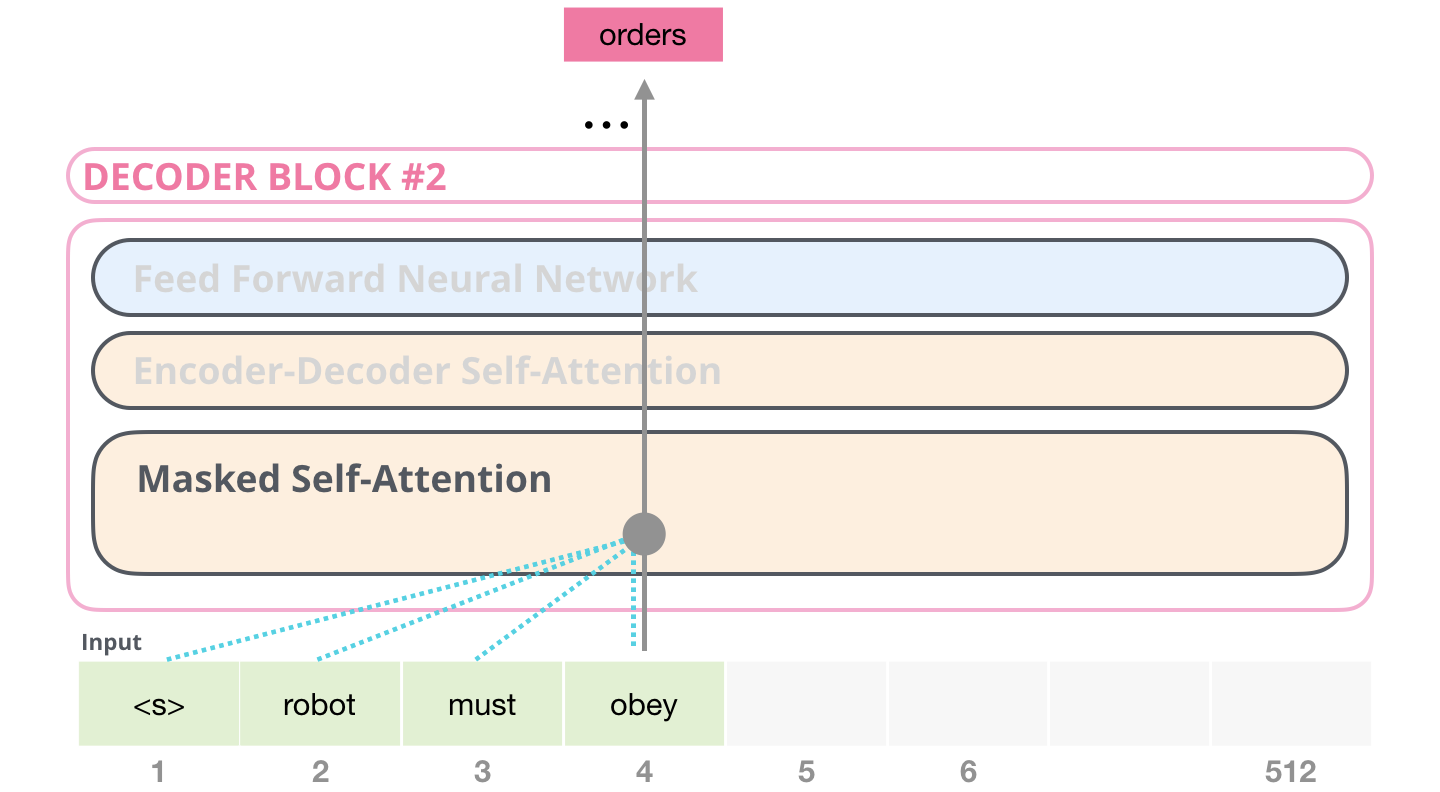

# Разные GPT
* GPT -- обучение на 7000 книгах, контекст 512
* GPT-2 -- В 10-ки раз больше параметров, конекст 1024, обучение на книгах и сайтах (40Гб)
* GPT-3 -- Еще в 10-ки раз больше, контекст 2048, 570Гб
* GPT-3.5 -- Такая же как GPT-3, специальным образом обучали модель получать хороший текст
* GPT-4 -- В 10-ки раз больше параметров...

# Как получить хороший текст?

* Самый вероятный токен
* Несколько самых вероятных
* Случайный с правильной вероятностью
* Обучить модель получать нужный токен

`num_beams` = кол-во путей с наибольшими неочевидными итоговыми вероятностными сочетаниями. Изначальный выбор путей происходит из топа величин вероятностей по первым нодам.

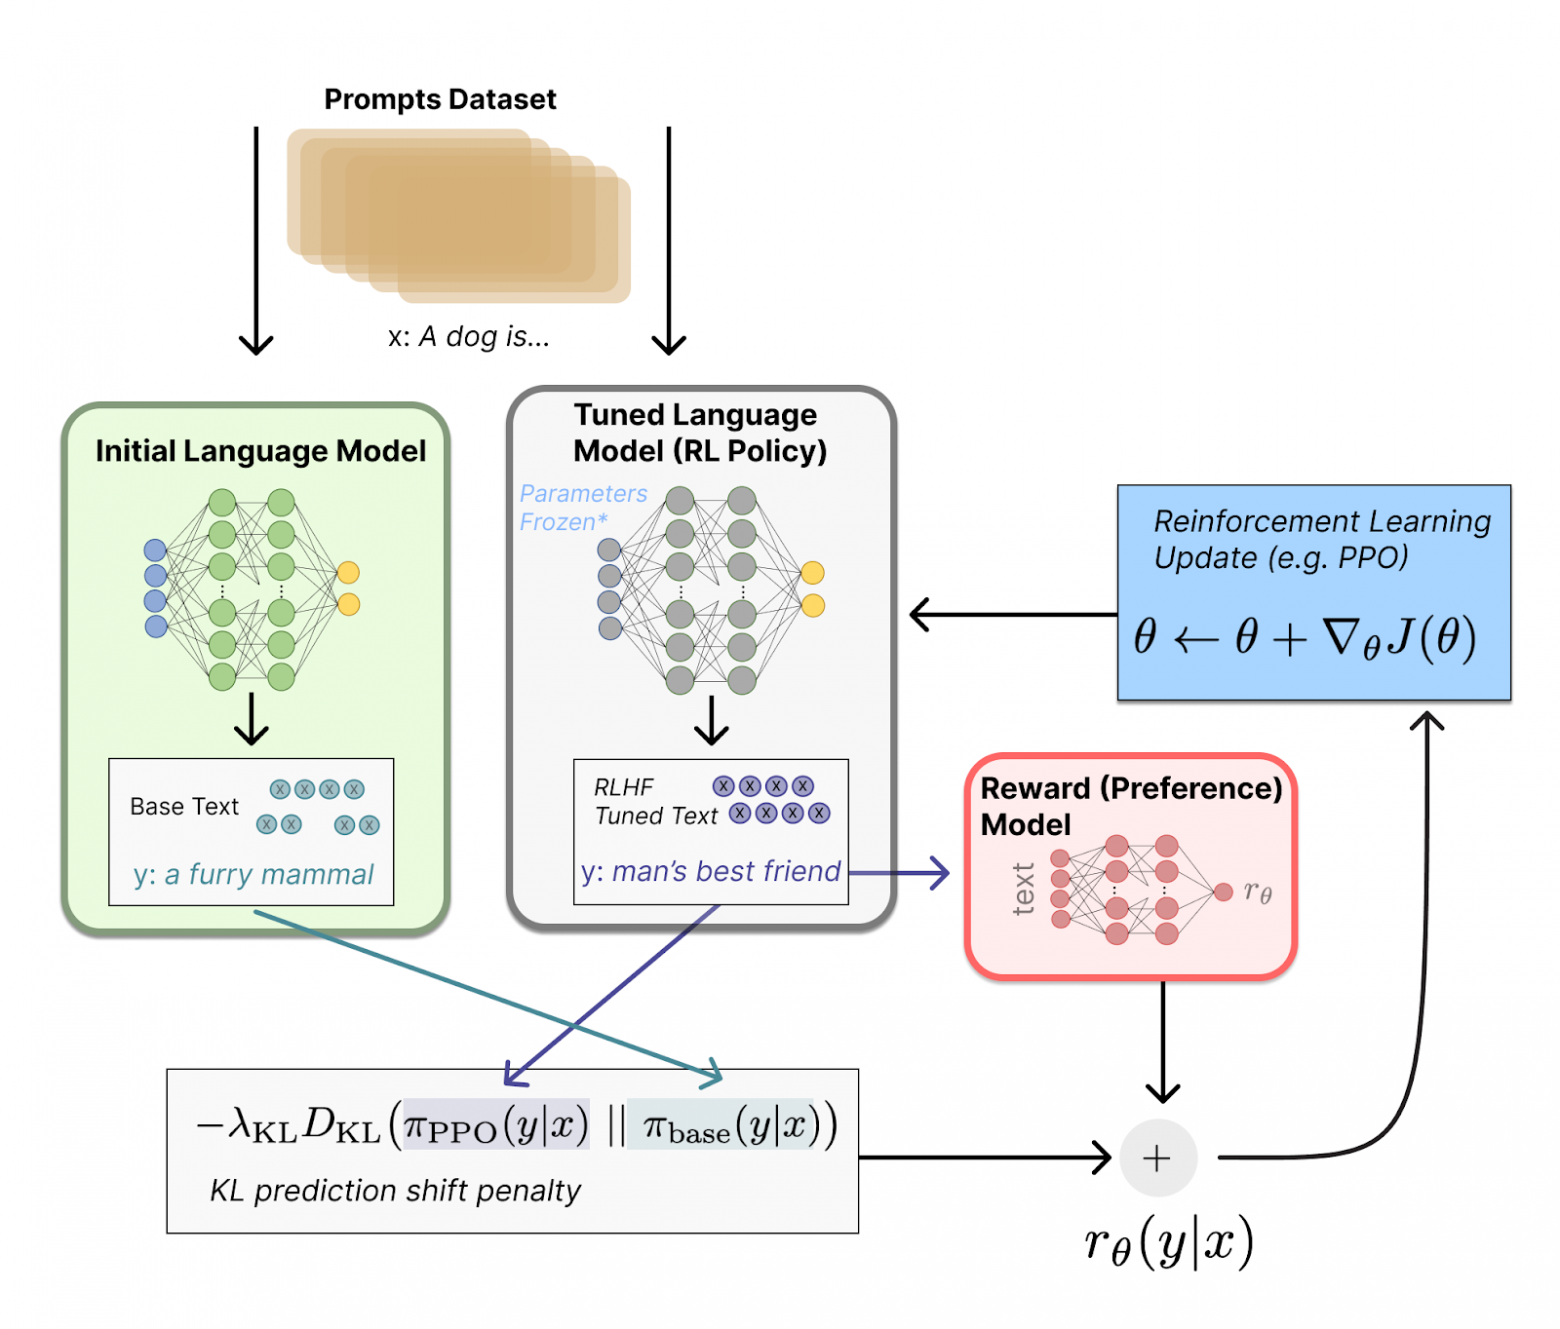

# Практика

In [ ]:
!pip3 install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.8 MB/s eta 0:00:00


## Generate

In [ ]:
import numpy as np
import torch

In [ ]:
np.random.seed(42)
torch.manual_seed(42)

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

In [ ]:
def load_tokenizer_and_model(model_name_or_path):
  return GPT2Tokenizer.from_pretrained(model_name_or_path), GPT2LMHeadModel.from_pretrained(model_name_or_path).cuda()

# https://huggingface.co/docs/transformers/v4.30.0/en/main_classes/text_generation#transformers.GenerationConfig
def generate(
    model, tok, text,
    do_sample=True, max_length=50, repetition_penalty=5.0,
    top_k=5, top_p=0.95, temperature=1,
    num_beams=10,
    no_repeat_ngram_size=3
    ):
  input_ids = tok.encode(text, return_tensors="pt").cuda()
  out = model.generate(
      input_ids.cuda(),
      max_length=max_length,
      repetition_penalty=repetition_penalty,
      do_sample=do_sample,
      top_k=top_k, top_p=top_p, temperature=temperature,
      num_beams=num_beams, no_repeat_ngram_size=no_repeat_ngram_size
      )
  return list(map(tok.decode, out))

### RuGPT2Large

In [ ]:
tok, model = load_tokenizer_and_model("sberbank-ai/rugpt2large")
generated = generate(model, tok, "Александр Сергеевич Пушкин родился в ")
generated[0]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'Александр Сергеевич Пушкин родился в \n1812 году. В 1826 году окончил Царскосельский лицей и поступил на юридический факультет Петербургского университета, но вскоре был исключен за участие в студенческом кружке «Зеленая лампа». С'

### RuGPT3Small

In [ ]:
tok, model = load_tokenizer_and_model("sberbank-ai/rugpt3small_based_on_gpt2")
generated = generate(model, tok, "Александр Сергеевич Пушкин родился в ")

generated[0]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'Александр Сергеевич Пушкин родился в  1825 г. в семье поэта Александра Сергеевича Пушкина и его жены Александры Николаевны Пушкиной (урожденной Пушкиных). В 1783 г. он поступил на юридический факультет Санкт-Петербургского университета'

### RuGPT3Medium

In [ ]:
tok, model = load_tokenizer_and_model("sberbank-ai/rugpt3medium_based_on_gpt2")
generated = generate(model, tok, "Александр Сергеевич Пушкин родился в ")

generated[0]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'Александр Сергеевич Пушкин родился в  1799 году, умер в 1837-м. Он был одним из самых образованных и одаренных людей своего времени. У него было много увлечений: он увлекался математикой, физикой, астрономией,'

### RuGPT3Large

In [ ]:
tok, model = load_tokenizer_and_model("sberbank-ai/rugpt3large_based_on_gpt2")
generated = generate(model, tok, "Александр Сергеевич Пушкин родился в ")


generated[0]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'Александр Сергеевич Пушкин родился в \n1799 году. Его отец был крепостным крестьянином, а мать – крепостной крестьянкой. Детство и юность поэта прошли в селе Михайловском Пензенской губернии. В 1820-х годах семья переехала'

In [ ]:
generated = generate(model, tok, "Александр Сергеевич Пушкин родился в ", max_length=100)


generated[0]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'Александр Сергеевич Пушкин родился в \n1799 году. Его отец был крепостным крестьянином, а мать – крепостной крестьянкой. Детство и юность Пушкина прошли в деревне Михайловское под Петербургом. В 1820-1821 годах он учился в Царскосельском лицее (ныне лицей имени А.С.Пушкина), затем поступил на юридический факультет Санкт-Петербургского университета. Во время учебы Пушкиным были написаны стихотворения «Клеветникам России», «'